In [1]:
import pandas as pd
from pathlib import Path
import random
import torch_geometric
import json

In [2]:
import sys
import os
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
parent_parent_dir = os.path.dirname(parent_dir)

sys.path.append(parent_dir)
sys.path.append(parent_parent_dir)

from utils import GenerationModule, MolGen, tensor_to_smiles

In [3]:
# read the configs
name1 = 'GNN1_charged'
epoch1 = 0
name2 = 'GNN2_charged'
epoch2 = 0
name3 = 'GNN3_charged'
epoch3 = 0
config1_path = Path('..') / 'Train' / 'GNN1' / 'config_GNN1.json'
config2_path = Path('..') / 'Train' / 'GNN2' / 'config_GNN2.json'
config3_path = Path('..') / 'Train' / 'GNN3' / 'config_GNN3.json'

# Read the config as a json

with open(config1_path, 'r') as f:
    config1 = json.load(f)
with open(config2_path, 'r') as f:
    config2 = json.load(f)
with open(config3_path, 'r') as f:
    config3 = json.load(f)



In [4]:
GNN1_path = Path('.') / 'models/trained_models/checkpoint_epoch_960_GNN1_charged.pt'
GNN2_path = Path('.') / 'models/trained_models/checkpoint_epoch_960_GNN2_charged.pt'
GNN3_path = Path('.') / 'models/trained_models/checkpoint_epoch_220_GNN3_charged.pt'

module = GenerationModule(config1=config1, config2=config2, config3=config3, encoding_size = 13, pathGNN1=GNN1_path, pathGNN2=GNN2_path, pathGNN3=GNN3_path)

In [10]:
graph = module.generate_mol_list(40)

In [11]:
# Convert the graph to smiles

def convert_to_smiles(graph):
    smiles = []
    for g in graph:
        smiles.append(tensor_to_smiles(g.x, g.edge_index, g.edge_attr))
    return smiles

In [12]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import SVG

def draw_molecules(molecules):
    smiles_list = convert_to_smiles(molecules)
    mols = [Chem.MolFromSmiles(m) for m in smiles_list]
    return Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200), maxMols=50)

[14:40:35] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18
[14:40:35] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 15 16
[14:40:35] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 22 23 24 25


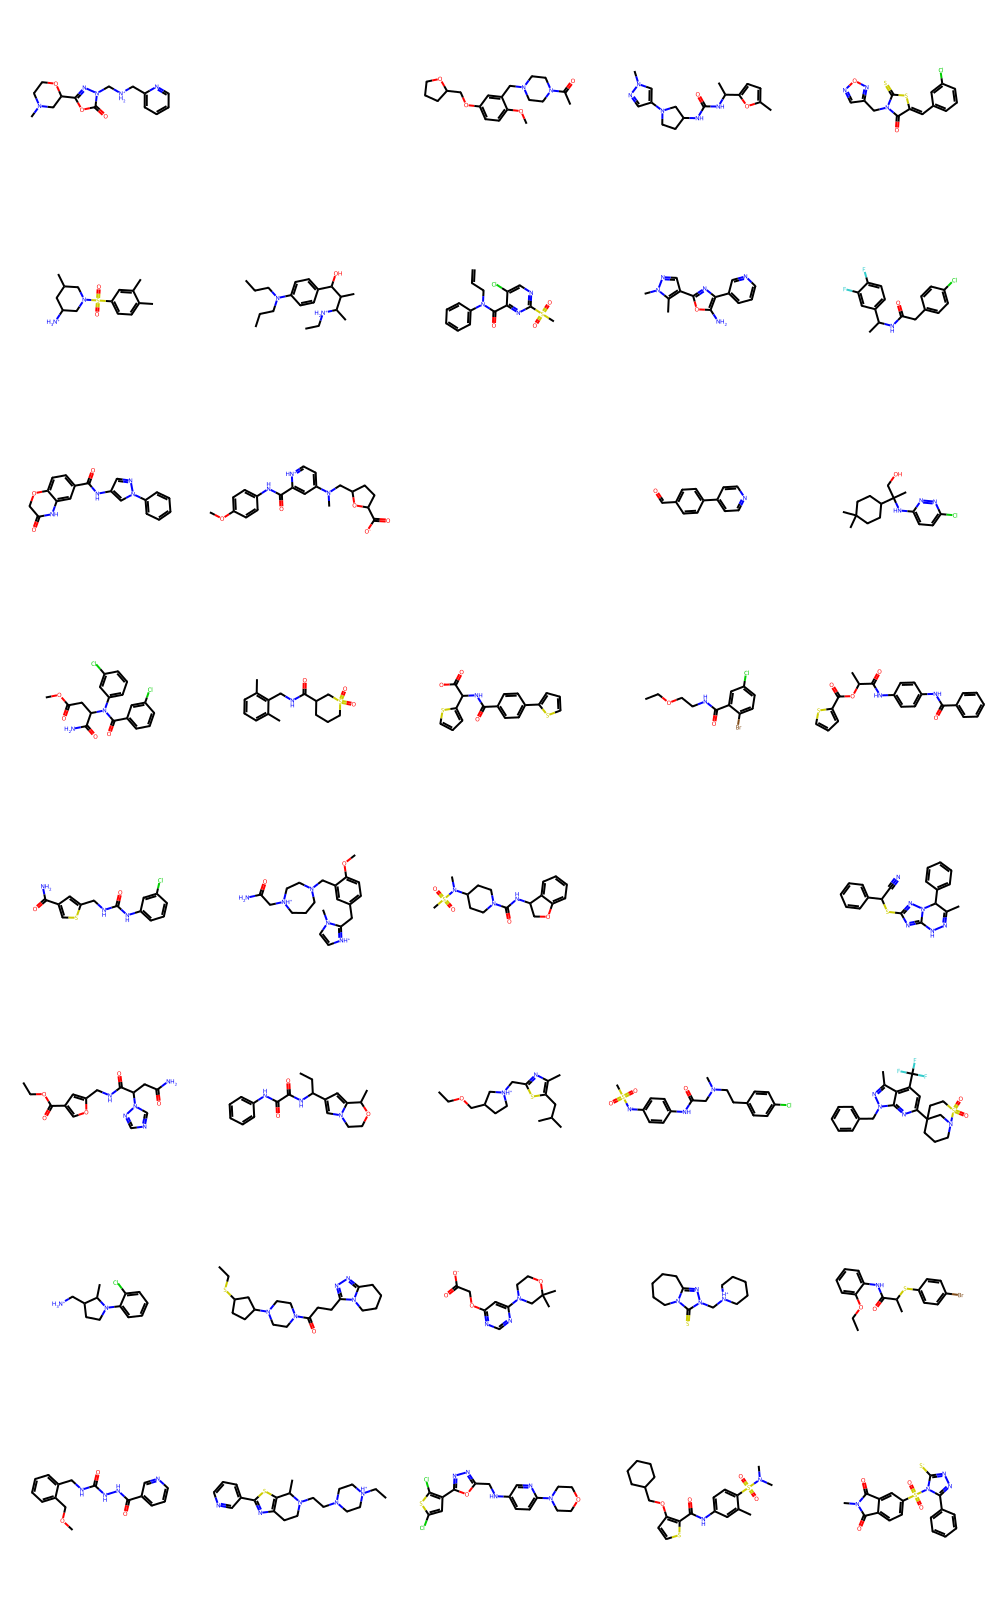

In [13]:
draw_molecules(graph)

In [9]:

smiles = tensor_to_smiles(graph_mol.x, graph_mol.edge_index, graph_mol.edge_attr)

NameError: name 'graph_mol' is not defined

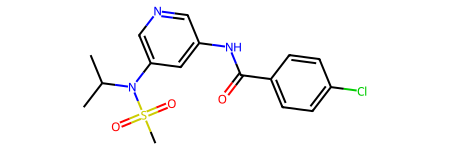

In [ ]:
from rdkit import Chem
Chem.MolFromSmiles(smiles)